# Transfer Learning using Pyspark


Name - Ojas Patil

Reg No - 21BAI1106

In [9]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [10]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

228813984/228813984 [==============================] - 2s 0us/step


PosixPath('/root/.keras/datasets/flower_photos')

PosixPath('/root/.keras/datasets/flower_photos')

In [11]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

PosixPath('/root/.keras/datasets/flower_photos')

/root/.keras/datasets/flower_photos/daisy/16121105382_b96251e506_m.jpg


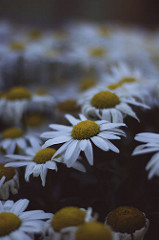

In [17]:
import PIL

roses = list(data_dir.glob('daisy/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

/root/.keras/datasets/flower_photos/dandelion/19613308325_a67792d889.jpg


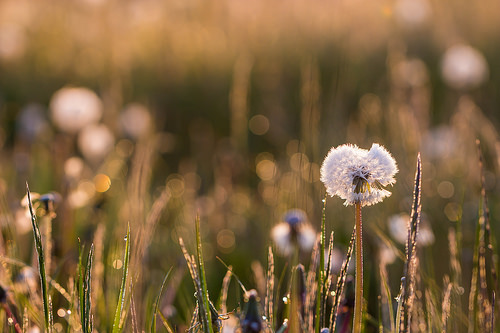

In [22]:
import PIL

roses = list(data_dir.glob('dandelion/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

/root/.keras/datasets/flower_photos/roses/9216323421_f737c1d50e.jpg


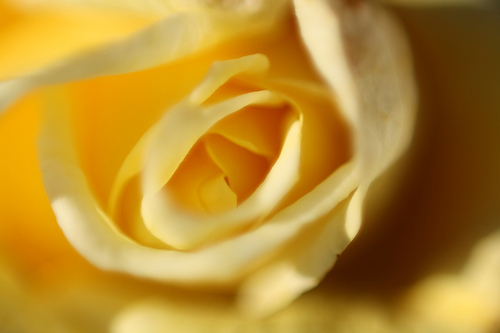

In [19]:
import PIL

roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

/root/.keras/datasets/flower_photos/sunflowers/4755075329_1fccc69d4e.jpg


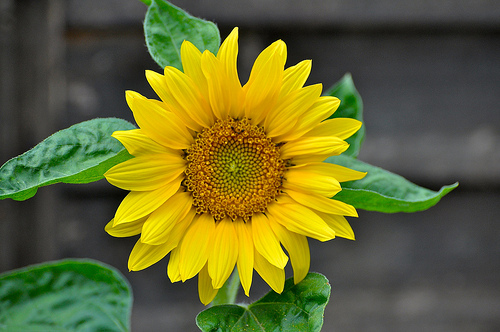

In [20]:
import PIL

roses = list(data_dir.glob('sunflowers/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

/root/.keras/datasets/flower_photos/tulips/506350421_2ba59e568e_m.jpg


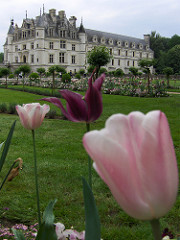

In [21]:
import PIL

roses = list(data_dir.glob('tulips/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [28]:
img_height,img_width=224, 224

In [29]:

batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [32]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False


In [33]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [34]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [35]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
92/92 [==============================] - 33s 168ms/step - loss: 1.8953 - accuracy: 0.2738 - val_loss: 1.3255 - val_accuracy: 0.5954
Epoch 2/10
92/92 [==============================] - 14s 144ms/step - loss: 1.1964 - accuracy: 0.4990 - val_loss: 0.7940 - val_accuracy: 0.7439
Epoch 3/10
92/92 [==============================] - 13s 132ms/step - loss: 0.8702 - accuracy: 0.6730 - val_loss: 0.5014 - val_accuracy: 0.8420
Epoch 4/10
92/92 [==============================] - 14s 152ms/step - loss: 0.6968 - accuracy: 0.7592 - val_loss: 0.4341 - val_accuracy: 0.8433
Epoch 5/10
92/92 [==============================] - 12s 128ms/step - loss: 0.6267 - accuracy: 0.8079 - val_loss: 0.3966 - val_accuracy: 0.8610
Epoch 6/10
92/92 [==============================] - 13s 141ms/step - loss: 0.5520 - accuracy: 0.8229 - val_loss: 0.3994 - val_accuracy: 0.8665
Epoch 7/10
92/92 [==============================] - 15s 155ms/step - loss: 0.5174 - accuracy: 0.8406 - val_loss: 0.3986 - val_accuracy: 0.8569

In [35]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

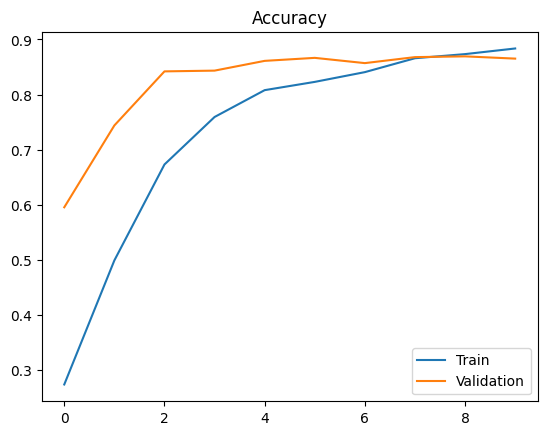

In [36]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [40]:
val_loss, val_acc = model.evaluate(val_ds)
print("The overall loss is: ", val_loss)
print("The best accuracy is: ", val_acc*100)

23/23 [==============================] - 3s 101ms/step - loss: 0.3863 - accuracy: 0.8651
The overall loss is:  0.38632917404174805
The best accuracy is:  86.51226162910461
